# Scanning the BP dataset with pysegy

This notebook demonstrates how to download the BP 1994 2-D seismic dataset, scan it using the `pysegy` utilities and then visualise the source and receiver positions as well as a few shot gathers.

In [1]:
import sys
sys.path.append('..')  # allow importing the local pysegy package
import pysegy
import urllib.request, gzip, os, shutil
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path = '../data/overthrust_2D_shot_1_20.segy'

In [3]:
scan = pysegy.segy_scan(path)
fh = scan.fileheader
print('Total shots:', len(scan))
print('Samples per trace:', fh.bfh.ns)

Scanning 1 files in ../data with 5 threads
ThreadPoolExecutor-0_0 scanning file ../data/overthrust_2D_shot_1_20.segy
Header for ../data/overthrust_2D_shot_1_20.segy: ns=751 dt=4000
ThreadPoolExecutor-0_0 found 20 shots in ../data/overthrust_2D_shot_1_20.segy
Combined scan has 20 shots
Total shots: 20
Samples per trace: 751


In [4]:
# Display human-readable headers
fh

BinaryFileHeader:
    Job                           :         1
    Line                          :         1
    Reel                          :         1
    DataTracePerEnsemble          :         1
    AuxiliaryTracePerEnsemble     :         0
    dt                            :      4000
    dtOrig                        :         0
    ns                            :       751
    nsOrig                        :         0
    DataSampleFormat              :         1
    EnsembleFold                  :         0
    TraceSorting                  :         0
    VerticalSumCode               :         0
    SweepFrequencyStart           :         0
    SweepFrequencyEnd             :         0
    SweepLength                   :         0
    SweepType                     :         0
    SweepChannel                  :         0
    SweepTaperlengthStart         :         0
    SweepTaperLengthEnd           :         0
    TaperType                     :         0
    CorrelatedDa

In [5]:
example_hdr = scan.read_headers(0, keys=['SourceX', 'GroupX', 'ns', "dt", "SourceDepth"])[0]
example_hdr

BinaryTraceHeader:
    SourceX                       :       400
    GroupX                        :       100
    ns                            :       751
    dt                            :      4000
    SourceDepth                   :        50

In [6]:
# Access ShotRecord directly and use lazy data
rec = scan[0]
hdr = rec.read_headers(keys=['SourceX'])[0]
block = rec.data
block

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  2.5824545e-37,  4.3110578e-35, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.2835668e-38,  6.0230533e-36,  1.0054672e-33, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.9605667e-03,  2.0977128e-03,  2.3908059e-03, ...,
        -4.2397034e-01, -4.1589242e-01, -4.0856093e-01],
       [-1.8224360e-03, -2.4230808e-03, -3.2525675e-03, ...,
        -3.7666947e-01, -3.7996423e-01, -3.8394350e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],
      shape=(751, 127), dtype=float32)

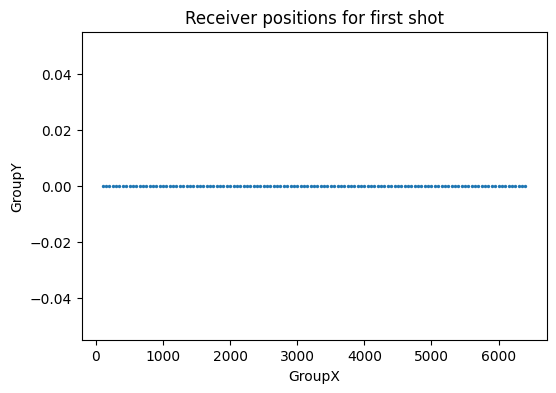

In [7]:
# Receiver coordinates for a shot
rec = scan[0]
coords = rec.rec_coordinates
plt.figure(figsize=(6,4))
plt.scatter(coords[:,0], coords[:,1], s=2)
plt.xlabel('GroupX')
plt.ylabel('GroupY')
plt.title('Receiver positions for first shot')
plt.show()

Shot 1 - Samples: 751, Traces: 127


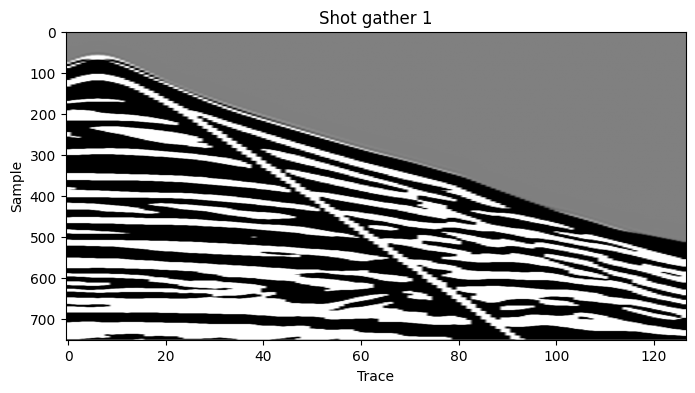

Shot 2 - Samples: 751, Traces: 131


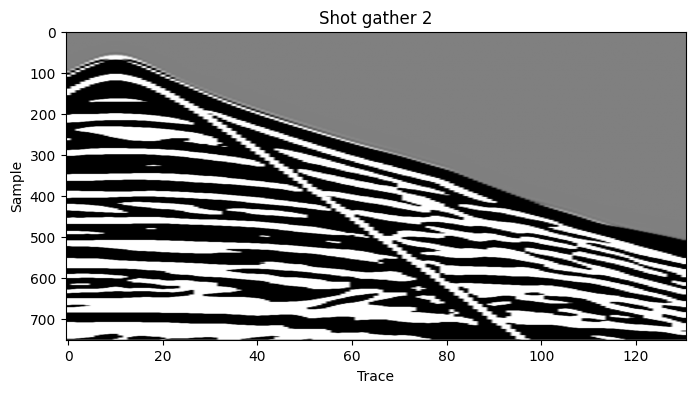

Shot 3 - Samples: 751, Traces: 135


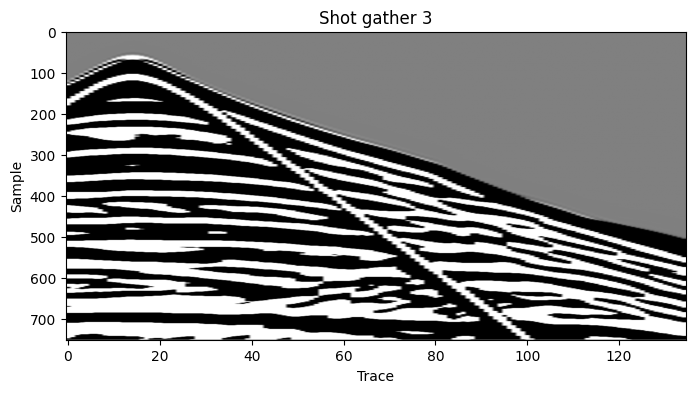

In [8]:

# Plot a few shot gathers using the lazy reader
for i in range(3):
    block = scan[i]
    print(f'Shot {i+1} - Samples: {block.data.shape[0]}, Traces: {block.data.shape[1]}')
    plt.figure(figsize=(8,4))
    plt.imshow(block.data, aspect='auto', cmap='gray', vmin=-.0001, vmax=.0001)
    plt.title(f'Shot gather {i+1}')
    plt.xlabel('Trace')
    plt.ylabel('Sample')
    plt.show()


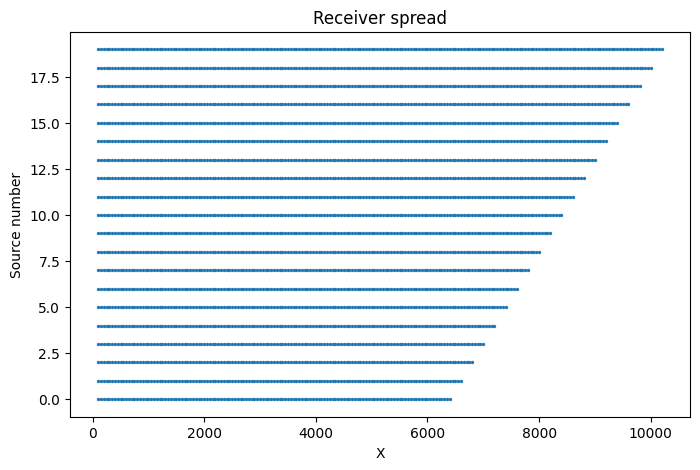

In [9]:

# Receiver spread across all sources
xvals = []
src_ids = []
for i in range(len(scan)):
    hdrs = scan.read_headers(i, keys=['GroupX'])
    xvals.extend(h.GroupX for h in hdrs)
    src_ids.extend([i] * len(hdrs))
plt.figure(figsize=(8,5))
plt.scatter(xvals, src_ids, s=2)
plt.xlabel('X')
plt.ylabel('Source number')
plt.title('Receiver spread')
plt.show()


In [10]:
assert len(scan.shots) == len(scan.counts)
assert scan.fileheader.bfh.ns == scan[0].fileheader.bfh.ns